# Tarea 5

NOTA
Los ejercicios de este notebook componen la Tarea5, para la que las fechas relevantes son:
Envío del PR inicial: lunes 17 de octubre
Aceptación del PR: lunes 31 de octubre

# Exponente(s) de Lyapunov

Una manera de caracterizar el caos en el sentido de *sensibilidad a condiciones iniciales* es a través de los exponentes de Liapunov. La idea es sencilla: si hay una separación *exponencial* de condiciones iniciales muy cercanas, entonces diremos que hay caos.

Por esto, simplemente monitoreamos la evolución de dos condiciones iniciales cercanas, $x_0$ y $x_0+\epsilon$, donde $\epsilon>0$ y pequeño.

Considerando mapeos en una dimensión, la distancia entre los iterados $n$ es

\begin{equation}
D_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
\end{equation}

ntonces, suponiendo que $d_n$ tiene una dependencia exponencial de $n$, para $n\to\infty$ y $\epsilon\to 0$, escribimos $d_n= \epsilon \exp(\lambda n)$, de donde obtenemos

\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \lim_{\epsilon\to 0} 
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

A $\lambda(x_0)$ se le llama exponente de Lyapunov. Si $\lambda(x_0)>0$ diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.

Observaciones:

- El exponente de Liapunov, estrictamente hablando, depende de la condición inicial $x_0$.

- En la definición del exponente de Lyapunov se require la evaluación de **dos** límites, uno que involucra al tiempo ($n\to\infty$), y otro a la condición inicial ($\epsilon\to 0$).

- La definición del exponente de Lyapunov es sutil, ya que en muchas ocasiones *sabemos* que el rango de $f(x)$ y de $f^n(x)$ es acotado cuando $x$ está en cierto dominio, lo que entonces podría llevar erróneamente a concluir que $\lambda(x_0)=0$. (La sutileza está en que el órden de los límites no conmuta.)

-

Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [1]:
Pkg.add("Roots")

INFO: Nothing to be done


In [2]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [3]:
using PyPlot, Roots
include("AutomDiff_V2.jl")
import AD: Dual, xdual

In [4]:
Pkg.add("TaylorSeries")

INFO: Nothing to be done


In [5]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [6]:
using TaylorSeries

Iterémos n veces una función f cualquiera dada una condición inicial $x_{0}$.

In [7]:
function iterandoando(f::Function,x0::Float64,n::Int64)
    ev = Float64[x0]
    x=x0
    for i in 1:n
        x=f(x)
        push!(ev,x)
    end
    ev
end

iterandoando (generic function with 1 method)

Calculemos entonces los exponentes de Lyapunov de la función f:

In [8]:
function exponentes(ev::Array,f::Function)
    n=length(ev)
    lambda=0
    for i in 1:n
        sumando=abs((f(xdual(ev[i]))).der)
        lambda=lambda + log(sumando)
       # println("Valor del exponente en la iteración")(i,lambda/i)
    end
    lambda/n
end


exponentes (generic function with 1 method)

Ahora utilicemos las funciones antes creadas para obtener los exponentes  de nuestras $Q_{c}(x)$. Como queremos encontrar los mínimos de la función, sólo nos interesarán los exponentes de Lyapunov negativos.

In [9]:
function explyap(Qc::Function,x0::Float64,crange::FloatRange,n::Int64)
    evaluacion=Float64[]
    valordec=Float64[]
    for i in crange
        Qci(x)=Qc(x,i)
        ev=iterandoando(Qci,x0,n)
        lambda=exponentes(ev,Qci)
        if lambda<=0
            if abs(lambda)<Inf
                push!(evaluacion,lambda)
            else
                push!(evaluacion,-10)       
          end
        else
            break 
        end 
    end 
    for i in 1:length(evaluacion)
        push!(valordec,crange[i])
    end
    evaluacion,valordec
end

explyap (generic function with 1 method)

In [10]:
Qc(x,c)=x^2+c

Qc (generic function with 1 method)

In [11]:
crange = -(0.75-1/2^16):-1/2^10:-1.405
func,c= explyap(Qc,1.0,crange,10000);

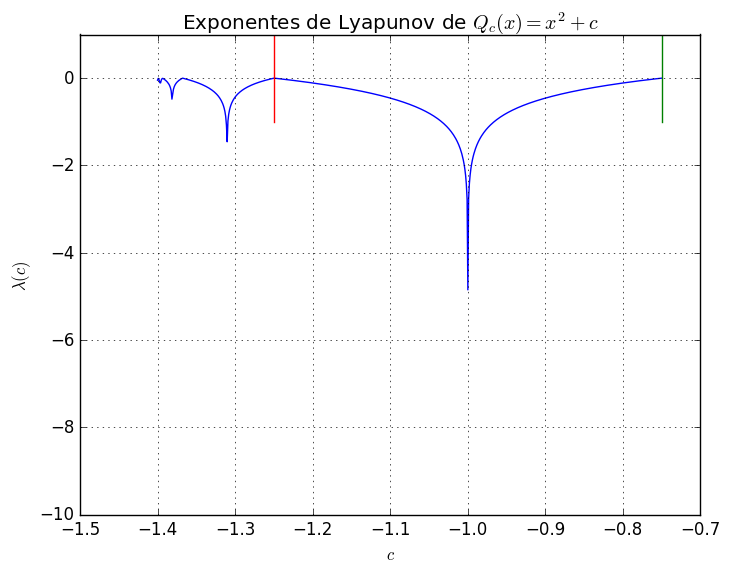

In [12]:
plot(c, func)
plot([-0.75,  -0.75], [1, -1])
plot([-1.25,  -1.25], [1, -1])
xlabel(L"c")
ylabel(L"\lambda(c)")
grid(true)
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$")
ylim(-10,1.0)
show()

Ahora encontremos los valores de c para los que los exponentes se anulan:

Los valores señalados son los valores de c de las bifurcaciones ya obtenidas previamente:
$c_1=-1/4$ y $c_2=-3/4$. Y notamos que en estos valores, los exponentes de Lyapunov son cero. Por lo que se puede intuir que 
esta es la particularidad en los valores de bifurcación.

Tratemos de comprobarlo encontrando los valores de c para los cuales los exponentes se anulan.

Implementemos la siguiente función que enlista los ceros en el arreglo $evaluación$ antes definido.

In [13]:
function ceros!(valores::Array,evaluaciones::Array,resultados::Array)
    for i in 1:length(evaluaciones)
        if abs(evaluaciones[i]) < 2e-4
            push!(resultados,valores[i])
        end
    end 
    
end

ceros! (generic function with 1 method)

In [14]:
resultados=Float64[]

0-element Array{Float64,1}

In [15]:
ceros!(c,func,resultados)

In [16]:
resultados

0-element Array{Float64,1}

Notamos que solo nos da (aproximadamente) el valor de $c_1=-3/4$,  con una sensibilidad de $2e-4$, lo cual se debe
al refinamiento dado en el cálculo de los exponentes. Sin embargo, al tratar de refinar, el tiempo de cálculo comienza
a crecer muy rápido, por lo que concluimos que el método puede ser optimizado para éstos fines. Sin embargo,
al estudiar la [literarura](http://hypertextbook.com/chaos/lyapunov-1/), encontramos que nuestra deducción es correcta. 

Ahora veamos qué pasa cuando la condición inicial es un punto fijo superestable ($x_0=0.0$):

Marquemos los puntos conocidos donde hay puntos superestables $c= -1,-1.3107$ en la siguiente gráfica.

In [17]:
crange = -(0.75-1/2^16):-1/2^10:-1.405
func,c= explyap(Qc,1.0,crange,10000);

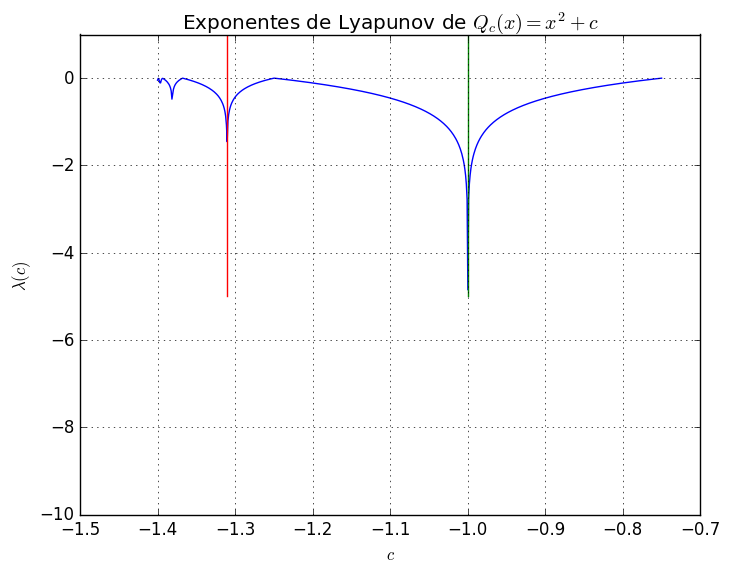

In [18]:
plot(c, func)
plot([-1,  -1], [1, -5,])
plot([-1.3107 ,  -1.3107 ], [1, -5,])
xlabel(L"c")
ylabel(L"\lambda(c)")
grid(true)
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$")
ylim(-10,1.0)
show()

Observamos que en estos valores, los exponentes de Lyapunov divergen a $- \infty$. Lo que, según la definición antes mencionada, son los puntos menos caóticos (o mas estables), del sistema. Ahora entendemos su nombre.

## Ejercicio 2:
Rehacer los cálculos de los exponentes de Feigenbaum, \begin{eqnarray*} fn &=& \frac{C_n-C{n+1}}{C{n+1}-C{n+2}},\ an &=& \frac{d_n}{d{n+1}}, \end{eqnarray*}
usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la Tarea4.)

In [19]:
#;clear()

In [20]:
Qc_p1(x,c) = x^2 + c
Qc_p1(x, args...) = !c(x, args[1])

Qc_p1 (generic function with 2 methods)

In [21]:
#Se utiliza la función del notebook para calcular la n-ésima iteración.
function Qc_n(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc_p1(x,c)
    for it = 1:n
        x = Qc_p1(x,c)
    end
    return x
end

Qc_n (generic function with 1 method)

In [22]:
using TaylorSeries

In [23]:
#Se utiliza la función vista en el notebook para calcular las raices por el métod de Newton.
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

Se calculan las $C_n$'s correspondientes a las iteraciones $2^n$ de 'Qc'. 

In [24]:
Q1c = c -> Qc_n(0.0, (c, 1))
C0 = roots_newton(Q1c, -1.4)

0.0

In [39]:
Q2c = c -> Qc_n(0.0, (c, 2))
C1 = roots_newton(Q2c, -1.0)

LoadError: LoadError: + not defined for TaylorSeries.Taylor1{Float64}
while loading In[39], in expression starting on line 2

In [26]:
Q4c = c -> Qc_n(0.0, (c, 4))
C2 = roots_newton(Q4c, -1.4)

LoadError: LoadError: + not defined for TaylorSeries.Taylor1{Float64}
while loading In[26], in expression starting on line 2

In [27]:
Q8c = c -> Qc_n(0.0, (c, 8))
C3 = roots_newton(Q8c, -1.4)

LoadError: LoadError: + not defined for TaylorSeries.Taylor1{Float64}
while loading In[27], in expression starting on line 2

In [28]:
Q16c = c -> Qc_n(0.0, (c, 16))
C4 = roots_newton(Q16c, -1.4)

LoadError: LoadError: + not defined for TaylorSeries.Taylor1{Float64}
while loading In[28], in expression starting on line 2

In [29]:
Q32c = c -> Qc_n(0.0, (c, 32))
C5 = roots_newton(Q32c, -1.4)

LoadError: LoadError: + not defined for TaylorSeries.Taylor1{Float64}
while loading In[29], in expression starting on line 2

In [30]:
cs=[C0,C1,C2,C3,C4,C5]

LoadError: LoadError: UndefVarError: C1 not defined
while loading In[30], in expression starting on line 1

Se calculan las $f_{n}$.

In [31]:
function fn(c::Array)
    fn=Float64[]
    for i in 1:length(cs)-2
        x=(c[i]-c[i+1])/(c[i+1]-c[i+2])
        push!(fn,x)
    end
    fn
end

fn (generic function with 1 method)

In [32]:
fn(cs)

LoadError: LoadError: UndefVarError: cs not defined
while loading In[32], in expression starting on line 1

Vemos que los números $f_{n}$'s convergen al núemro de Feigenbaum $4.6692$

Se utilza la función de la tarea4 para calcular las $d_{n}$'s.

In [33]:
function d_n(a::Array)
    d=Float64[]
    for i in 2:length(a)
        y=minabs(deleteat!(iterandoando(x->Qc_p(x,a[i]),0.0,(2^(i-1))-1),1))
        push!(d,y)
    end
    d
end

d_n (generic function with 1 method)

In [34]:
d_n(cs)

LoadError: LoadError: UndefVarError: cs not defined
while loading In[34], in expression starting on line 1

Se utilza la función de la tarea4 para calcular las $a_{n}$'s

In [35]:
function suc2(a::Array)
    coc=Float64[]
    for i in 1:length(a)-1
        d=a[i]/a[i+1]
        push!(coc,d)
    end
    coc
end

suc2 (generic function with 1 method)

In [36]:
suc2(d_n(cs))

LoadError: LoadError: UndefVarError: cs not defined
while loading In[36], in expression starting on line 1

Se observa que la suseción converge a $2.5029$, el cual es la segunda constante de Feigenbaum.


## Ejercicio 3:
Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$.

In [37]:
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc_p(x,c)
    for it = 1:n
        x = Qc_p(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [38]:
cplot1 = Float64[0,-3/4, -1, -2, -2.2]
xrange = -2:1/64:2
plot(xrange, x->Qcⁿ(x, (1/4,1)), size=(500,500), label = "c = 0.25")
for i in cplot1
    plot!(xrange, x->Qcⁿ(x, (i,1)), label = "c = $i")
end
plot(xrange, identity, label = L"Id(x)")
ylims(-3,2)
xlabel(L"x")
ylabel(L"Q_c(x)")
title(L"c = C_0")

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('x and y must have same first dimension',)
  File "/home/pablorv/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/home/pablorv/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py", line 1812, in inner
    return func(ax, *args, **kwargs)
  File "/home/pablorv/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1424, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/home/pablorv/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/home/pablorv/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/home/pablorv/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[38], in expression starting on line 3